## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
merged_df

#1,893 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Data Clean-up

In [3]:
# Checking the number of mice in the DataFrame.
mouse_count= merged_df["Mouse ID"].value_counts()
mouse_count

g989    13
z578    10
a411    10
t724    10
p189    10
        ..
x226     1
x336     1
v199     1
l872     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_mouse=merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dupes_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_info= merged_df[merged_df["Mouse ID"]=="g989"]
print(dupe_info.index)
print()
dupe_info.head(13)

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= merged_df[merged_df["Mouse ID"]!="g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count=cleaned_df["Mouse ID"].count()
mouse_count

1880

## Summary Statistics

## Tumor Response to Treatment

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#MEAN
#Grouping by Drug and Timepoint
tumor_mean_df= cleaned_df.groupby(["Drug Regimen",])["Tumor Volume (mm3)"].mean()

#Converting into Dataframe
tumor_mean_df=pd.DataFrame(tumor_mean_df)

#Resetting indexes
tumor_mean_df=tumor_mean_df.reset_index()

#renaming columns 
tumor_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"},inplace=True)

tumor_mean_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Drug Regimen,Mean Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [9]:
#SEM
tumor_volume_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
            

#Converting to DataFrame
tumor_sem_df = pd.DataFrame(tumor_volume_sem)

#Resetting indexes
tumor_sem_df=tumor_sem_df.reset_index()

#renaming columns 
tumor_sem_df.rename(columns={"Tumor Volume (mm3)": "SEM Tumor Volume (mm3)"},inplace=True)

tumor_sem_df

,Drug Regimen,SEM Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.544332
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [10]:
#Median
tumor_volume_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

#Converting to DataFrame
tumor_median_df = pd.DataFrame(tumor_volume_median)

#Resetting indexes
tumor_median_df=tumor_median_df.reset_index()

#renaming columns 
tumor_median_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"},inplace=True)

tumor_median_df


,Drug Regimen,Median Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [11]:
#Variance

# Demonstrate calculating measures of central tendency
tumor_volume_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

#Converting to DataFrame
tumor_var_df = pd.DataFrame(tumor_volume_var)

#Resetting indexes
tumor_var_df=tumor_var_df.reset_index()

#renaming columns 
tumor_var_df.rename(columns={"Tumor Volume (mm3)": "Var Tumor Volume (mm3)"},inplace=True)

tumor_var_df


,Drug Regimen,Var Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.852013
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [12]:
#Standard Deviation

# Demonstrate calculating measures of central tendency
tumor_volume_sd = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

#Converting to DataFrame
tumor_sd_df = pd.DataFrame(tumor_volume_var)

#Resetting indexes
tumor_sd_df=tumor_sd_df.reset_index()

#renaming columns 
tumor_sd_df.rename(columns={"Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"},inplace=True)

tumor_sd_df

,Drug Regimen,Standard Deviation Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.852013
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Summary Table

summary_table_df=pd.merge(tumor_mean_df,tumor_sem_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_median_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_var_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_sd_df, on="Drug Regimen", how="outer")

summary_table_df


,Drug Regimen,Mean Tumor Volume (mm3),SEM Tumor Volume (mm3),Median Tumor Volume (mm3),Var Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3)
0,Capomulin,40.675741,0.329346,41.557809,24.947764,24.947764
1,Ceftamin,52.591172,0.469821,51.776157,39.290177,39.290177
2,Infubinol,52.884795,0.492236,51.820584,43.128684,43.128684
3,Ketapril,55.235638,0.603860,53.698743,68.553577,68.553577
4,Naftisol,54.331565,0.596466,52.509285,66.173479,66.173479
5,Placebo,54.033581,0.581331,52.288934,61.168083,61.168083
6,Propriva,52.320930,0.544332,50.446266,43.852013,43.852013
7,Ramicane,40.216745,0.320955,40.673236,23.486704,23.486704
8,Stelasyn,54.233149,0.573111,52.431737,59.450562,59.450562
9,Zoniferol,53.236507,0.516398,51.818479,48.533355,48.533355


## Bar Plots

<IPython.core.display.Javascript object>


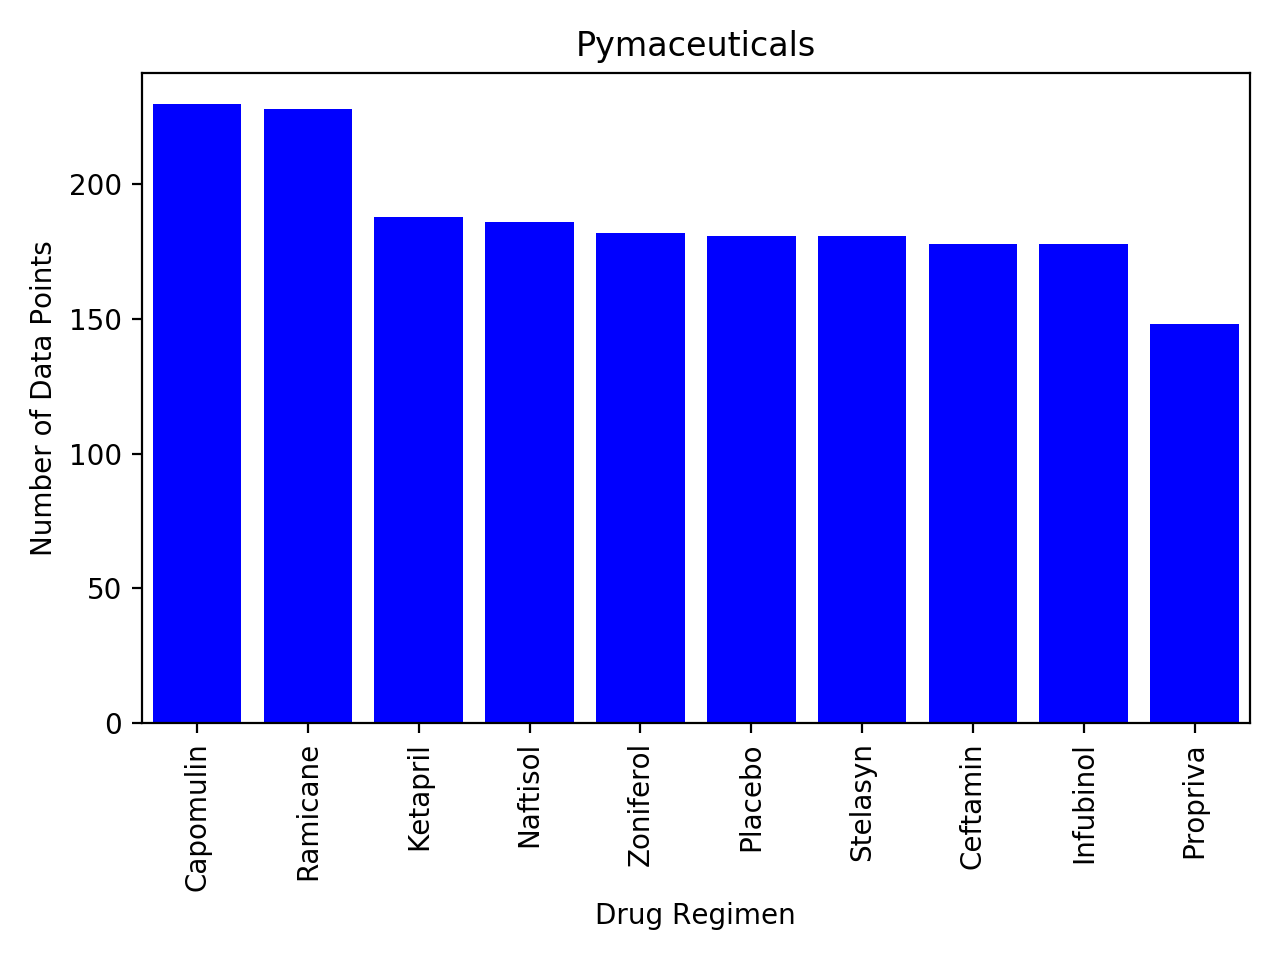

In [14]:
#Filter the DataFrame down only to chose those columns to chart
#Pandas Method
drug_timepoint=cleaned_df[["Drug Regimen","Timepoint"]]

#Set the index to be "Drug Regimen" so they will be used as labels
drug_timepoint=drug_timepoint.set_index("Drug Regimen")

drug_data=cleaned_df["Drug Regimen"].value_counts()

drug_data.plot(kind="bar", facecolor="blue")
                    
# Set textual properties
plt.title("Pymaceuticals")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Matplotlib Method. Different approach discussed in class.

drug_timepoint=cleaned_df[["Drug Regimen","Timepoint"]]

#Set the index to be "Drug Regimen" so they will be used as labels
drug_timepoint=drug_timepoint.set_index("Drug Regimen")

drug_data=cleaned_df["Drug Regimen"].value_counts()

drug_data.plot(kind="bar", facecolor="blue")
                    
#Defining x and y 
count_mouse=drug_mouse_data["Count of Mouse ID"]
drugs=drug_mouse_data["Drug Regimen"]

# create bar chart with x and y labels
x_axis = np.arange(len(count_mouse))
plt.bar(x_axis, count_mouse, color='b', alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

plt.show()

## Pie Plots

<IPython.core.display.Javascript object>


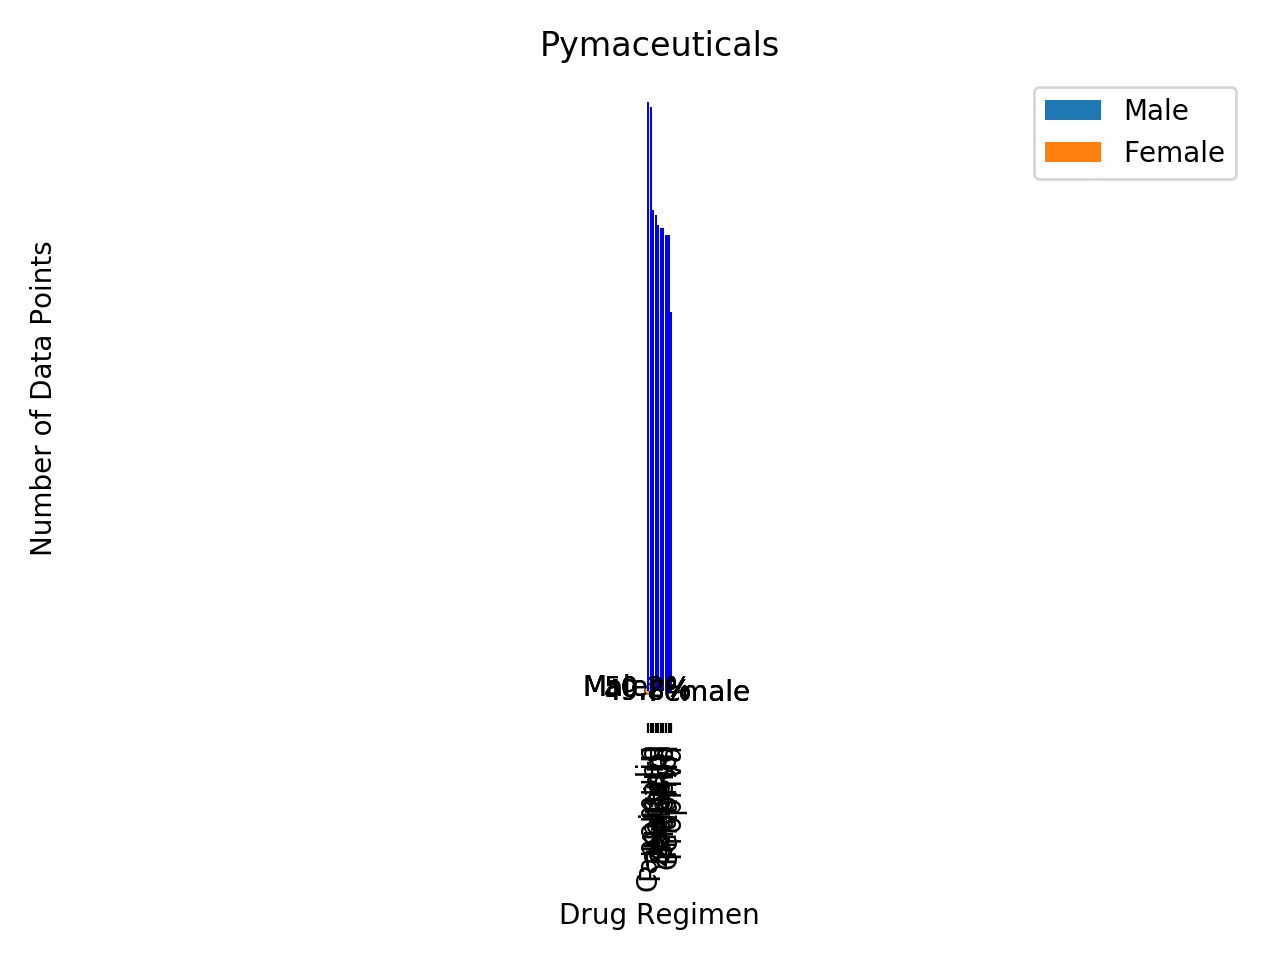

(-1.1016630746735625,
 1.1000791940320744,
 -1.1017685314144794,
 1.1009347297692742)

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= merged_df[["Mouse ID","Sex"]].drop_duplicates("Mouse ID")

#group by gender
groupby_gender= gender.groupby(["Sex"])

#Create DataFrame
gender_df=groupby_gender["Sex"].count().to_frame(name="Gender Count").reset_index()

#Sorting
gender_df=gender_df.sort_values(["Sex"], ascending=False)

labels=["Male", "Female"]

pie=gender_df.plot.pie(y="Gender Count", labels=labels, autopct="%.1f%%")
plt.show()
plt.axis("equal")

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# drop duplicate Mouse IDs
gender = merged_df[["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
gender

# Group by
genderGroup = gender.groupby(["Sex"])
genderGroup.count()

# Reset indexes
gender_df = genderGroup["Sex"].count().to_frame(name = "Gender Count").reset_index()
gender_df.count().head()

# Sort
gender_df = gender_df.sort_values(["Sex"], ascending=False)
gender_df

# set x and y
genderCount = gender_df["Gender Count"]
gender = gender_df["Sex"] 

# create pie plot with y label
x_axis = np.arange(0, len(genderCount))
colors = ["yellow","orange"]
genderPie2 = plt.pie(genderCount, labels=gender, colors=colors,autopct="%1.1f%%", shadow=True)

plt.ylabel("Gender Count")
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
